In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.pandas.set_option('display.max_columns', None)

In [2]:
dataframe = pd.read_csv("RTU.csv")

In [3]:
dataframe.head()

,Timestamp,RTU: Supply Air Temperature,RTU: Return Air Temperature,RTU: Supply Air Fan Status,RTU: Circuit 1 Discharge Temperature,RTU: Circuit 1 Condenser Outlet Temperature,RTU: Circuit 1 Suction Temperature,RTU: Circuit 2 Discharge Temperature,RTU: Circuit 2 Condenser Outlet Temperature,RTU: Circuit 2 Suction Temperature,RTU: Circuit 1 Discharge Pressure,RTU: Circuit 1 Condenser Outlet Pressure,RTU: Circuit 1 Suction Pressure,RTU: Circuit 2 Discharge Pressure,RTU: Circuit 2 Condenser Outlet Pressure,RTU: Circuit 2 Suction Pressure,RTU: Supply Air Volumetric Flow Rate,RTU: Electricity,RTU: Natural Gas,Occupancy Mode Indicator,Terminal: Room 102 Air Humidity,Terminal: Room 103 Air Humidity,Terminal: Room 104 Air Humidity,Terminal: Room 105 Air Humidity,Terminal: Room 106 Air Humidity,Terminal: Room 202 Air Humidity,Terminal: Room 203 Air Humidity,Terminal: Room 204 Air Humidity,Terminal: Room 205 Air Humidity,Terminal: Room 206 Air Humidity,Terminal: Room 102 Air Temperature,Terminal: Room 103 Air Temperature,Terminal: Room 104 Air Temperature,Terminal: Room 105 Air Temperature,Terminal: Room 106 Air Temperature,Terminal: Room 202 Air Temperature,Terminal: Room 203 Air Temperature,Terminal: Room 204 Air Temperature,Terminal: Room 205 Air Temperature,Terminal: Room 206 Air Temperature,Terminal: Room Air Temperature Heating Setpoint,Terminal: Room Air Temperature Cooling Setpoint,HVAC System: Electricity,Lighting System: Electricity,Lighting System: Control Command,RTU: Compressor 1 On/Off Status,RTU: Compressor 2 On/Off Status,RTU: Fan Electricity,VAV Box: Room 102 Reheat Status,VAV Box: Room 103 Reheat Status,VAV Box: Room 104 Reheat Status,VAV Box: Room 105 Reheat Status,VAV Box: Room 106 Reheat Status,VAV Box: Room 202 Reheat Status,VAV Box: Room 203 Reheat Status,VAV Box: Room 204 Reheat Status,VAV Box: Room 205 Reheat Status,VAV Box: Room 206 Reheat Status,VAV Box: Room 102 Air Temperature,VAV Box: Room 103 Air Temperature,VAV Box: Room 104 Air Temperature,VAV Box: Room 105 Air Temperature,VAV Box: Room 106 Air Temperature,VAV Box: Room 202 Air Temperature,VAV Box: Room 203 Air Temperature,VAV Box: Room 204 Air Temperature,VAV Box: Room 205 Air Temperature,VAV Box: Room 206 Air Temperature,Fault Detection Ground Truth
0,8/27/2017 0:00,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.07747,0.0,0,50.06,47.64,49.42,47.12,49.55,48.64,47.86,45.73,44.14,44.67,72.32,74.03,72.02,72.83,72.92,73.14,72.67,72.84,74.62,74.87,60.0,80.0,3.50865,10.57066,0,0,0,0.32319,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,8/27/2017 0:01,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.30830,0.0,0,49.97,47.64,49.47,47.17,49.61,48.66,48.05,45.76,44.04,44.68,72.29,73.97,72.01,72.85,72.95,73.17,72.66,72.85,74.58,74.93,60.0,80.0,3.70485,10.57066,0,0,0,0.32319,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,8/27/2017 0:02,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.07747,0.0,0,50.06,47.69,49.43,47.20,49.65,48.71,47.95,45.76,44.12,44.72,72.34,74.05,71.99,72.90,72.97,73.21,72.72,72.88,74.66,74.92,60.0,80.0,3.54327,10.55142,0,0,0,0.32319,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,8/27/2017 0:03,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.07747,0.0,0,50.10,47.67,49.57,47.21,49.65,48.68,47.90,45.79,44.02,44.88,72.31,74.08,72.03,72.85,72.99,73.20,72.72,72.87,74.64,74.99,60.0,80.0,3.42785,10.57451,0,0,0,0.27702,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,8/27/2017 0:04,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.07747,0.0,0,50.02,47.69,49.50,47.24,49.59,48.71,47.98,45.79,44.01,44.82,72.29,74.04,72.00,72.90,72.94,73.18,72.70,72.85,74.51,74.97,60.0,80.0,3.47402,10.57066,0,0,0,0.32319,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
dataframe.tail()
dataframe.shape

(30240, 69)

In [5]:
df = dataframe.dropna().reset_index()

In [6]:
df.head()

,index,Timestamp,RTU: Supply Air Temperature,RTU: Return Air Temperature,RTU: Supply Air Fan Status,RTU: Circuit 1 Discharge Temperature,RTU: Circuit 1 Condenser Outlet Temperature,RTU: Circuit 1 Suction Temperature,RTU: Circuit 2 Discharge Temperature,RTU: Circuit 2 Condenser Outlet Temperature,RTU: Circuit 2 Suction Temperature,RTU: Circuit 1 Discharge Pressure,RTU: Circuit 1 Condenser Outlet Pressure,RTU: Circuit 1 Suction Pressure,RTU: Circuit 2 Discharge Pressure,RTU: Circuit 2 Condenser Outlet Pressure,RTU: Circuit 2 Suction Pressure,RTU: Supply Air Volumetric Flow Rate,RTU: Electricity,RTU: Natural Gas,Occupancy Mode Indicator,Terminal: Room 102 Air Humidity,Terminal: Room 103 Air Humidity,Terminal: Room 104 Air Humidity,Terminal: Room 105 Air Humidity,Terminal: Room 106 Air Humidity,Terminal: Room 202 Air Humidity,Terminal: Room 203 Air Humidity,Terminal: Room 204 Air Humidity,Terminal: Room 205 Air Humidity,Terminal: Room 206 Air Humidity,Terminal: Room 102 Air Temperature,Terminal: Room 103 Air Temperature,Terminal: Room 104 Air Temperature,Terminal: Room 105 Air Temperature,Terminal: Room 106 Air Temperature,Terminal: Room 202 Air Temperature,Terminal: Room 203 Air Temperature,Terminal: Room 204 Air Temperature,Terminal: Room 205 Air Temperature,Terminal: Room 206 Air Temperature,Terminal: Room Air Temperature Heating Setpoint,Terminal: Room Air Temperature Cooling Setpoint,HVAC System: Electricity,Lighting System: Electricity,Lighting System: Control Command,RTU: Compressor 1 On/Off Status,RTU: Compressor 2 On/Off Status,RTU: Fan Electricity,VAV Box: Room 102 Reheat Status,VAV Box: Room 103 Reheat Status,VAV Box: Room 104 Reheat Status,VAV Box: Room 105 Reheat Status,VAV Box: Room 106 Reheat Status,VAV Box: Room 202 Reheat Status,VAV Box: Room 203 Reheat Status,VAV Box: Room 204 Reheat Status,VAV Box: Room 205 Reheat Status,VAV Box: Room 206 Reheat Status,VAV Box: Room 102 Air Temperature,VAV Box: Room 103 Air Temperature,VAV Box: Room 104 Air Temperature,VAV Box: Room 105 Air Temperature,VAV Box: Room 106 Air Temperature,VAV Box: Room 202 Air Temperature,VAV Box: Room 203 Air Temperature,VAV Box: Room 204 Air Temperature,VAV Box: Room 205 Air Temperature,VAV Box: Room 206 Air Temperature,Fault Detection Ground Truth
0,403,8/27/2017 6:43,67.22,74.72,1,92.2,75.87,58.50,75.88,70.95,70.92,347.9,-441.3,142.7,231.8,228.5,216.0,4339.0,108.9518,0.0,1,49.80,47.02,51.82,49.16,50.87,48.00,48.57,49.70,47.14,46.57,76.52,77.84,74.18,75.47,75.27,76.85,76.39,74.24,75.72,76.76,69.8,75.2,111.07547,9.12400,0,1,0,36.01260,0,0,0,0,0,0,0,0,0,0,69.36,69.04,69.54,69.52,70.06,69.85,69.22,69.79,69.47,70.09,1
1,404,8/27/2017 6:44,62.92,74.76,1,119.2,96.10,59.00,73.93,69.79,71.32,418.4,-381.0,161.6,195.9,195.8,197.6,4378.0,130.4189,0.0,1,50.14,47.47,51.87,49.40,50.91,48.68,48.52,50.11,47.24,47.20,76.10,77.40,73.92,75.28,75.01,76.35,75.84,73.80,75.40,76.41,69.8,75.2,132.49640,9.15863,0,1,0,36.24345,0,0,0,0,0,0,0,0,0,0,67.31,66.86,67.77,67.92,68.94,67.38,65.89,67.17,66.57,67.71,1
2,405,8/27/2017 6:45,61.00,74.70,1,133.7,106.30,55.05,73.54,69.30,71.47,456.6,-348.3,162.4,192.6,192.6,194.8,4392.0,140.5755,0.0,1,50.24,47.62,51.97,49.18,51.02,49.39,48.88,50.75,47.67,47.53,75.61,76.95,73.64,74.95,74.74,75.80,75.13,73.30,74.89,76.09,69.8,75.2,142.76842,9.19711,0,1,0,36.28962,0,0,0,0,0,0,0,0,0,0,65.34,64.79,65.85,66.06,67.38,65.22,63.40,64.95,64.24,65.58,1
3,406,8/27/2017 6:46,58.69,74.57,1,144.1,123.90,49.69,117.00,92.00,49.95,550.4,-267.1,158.6,550.1,524.6,158.7,4402.0,246.7573,0.0,1,50.61,48.02,52.21,49.28,50.70,50.17,49.15,51.39,48.14,47.98,75.00,76.55,73.25,74.59,74.50,75.31,74.48,72.74,74.67,75.72,69.8,75.2,248.82326,9.19326,0,1,1,36.61281,0,0,0,0,0,0,0,0,0,0,63.69,63.08,64.25,64.39,65.91,63.35,61.47,63.06,62.38,63.79,1
4,407,8/27/2017 6:47,56.98,74.46,1,157.1,138.30,50.53,160.80,114.70,50.92,626.6,-203.6,160.9,625.5,601.4,163.6,4410.0,303.7723,0.0,1,50.18,48.08,51.96,49.12,50.64,50.05,48.79,51.40,47.95,47.89,74.56,76.09,72.90,74.25,74.21,74.70,

### Co - Relation of reheat status to electricity consumption

In [7]:
electricity = df['RTU: Electricity'].to_numpy()
VAV_box_room_reheat_status = [feature for feature in df.columns if 'Reheat Status' in feature]
reheat_status_array = []
for ind in df[VAV_box_room_reheat_status].index:
    a = df[VAV_box_room_reheat_status].iloc[ind].to_numpy()
    reheat_status_array.append(a.mean())

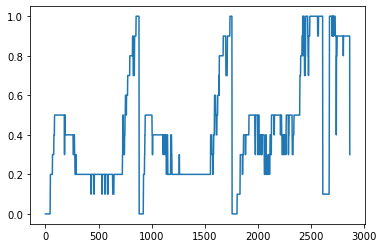

In [8]:
plt.plot(reheat_status_array)

As we see reheating is on during the datapoints indexed at 500 to 1000 then 1500 to 2000 subsequently from 2000 to 3000.

Let's check if the electricity consumption is co-related with this status.

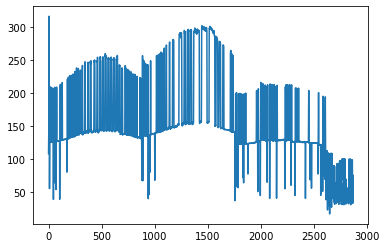

In [9]:
plt.plot(electricity)

There seems to be almost no or skewed relation between the reheat status of the rooms to the electricity consumption as there is less consumption during 2500 to 3000th datapoints where there is almost full reheat. Also one important conclusion we can come from the electricity plot is that over the time electricity consumption is reduced significantly.

Also a important observation is that supply air fan reheat status is on for all the data points so it is redundant for forecasting and analysing the electricity consumption. So we can drop it out for our further analysis.

In [10]:
df = df.drop('RTU: Supply Air Fan Status', axis=1)

### Terminal Room air temperature

In [11]:
terminal_room_air_temperature = [feature for feature in df.columns if 'Air' and 'Terminal:' in feature  and 'Room' in feature and 'Temperature' in feature and 'Setpoint' not in feature]
terminal_room_air_temperature

['Terminal: Room 102 Air Temperature',
 'Terminal: Room 103 Air Temperature',
 'Terminal: Room 104 Air Temperature',
 'Terminal: Room 105 Air Temperature',
 'Terminal: Room 106 Air Temperature',
 'Terminal: Room 202 Air Temperature',
 'Terminal: Room 203 Air Temperature',
 'Terminal: Room 204 Air Temperature',
 'Terminal: Room 205 Air Temperature',
 'Terminal: Room 206 Air Temperature']

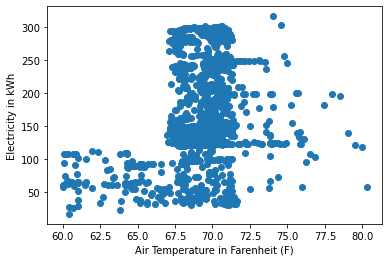

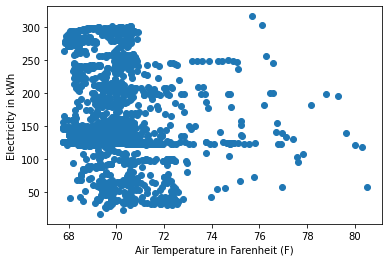

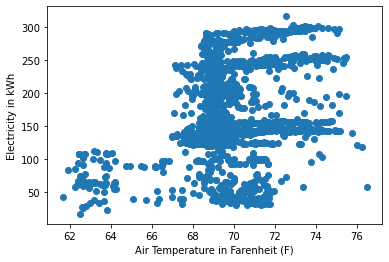

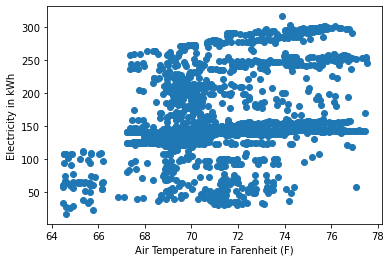

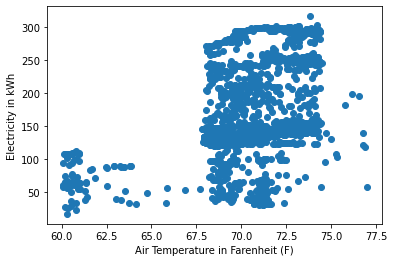

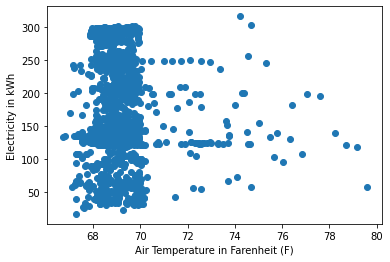

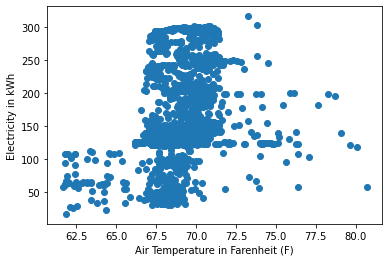

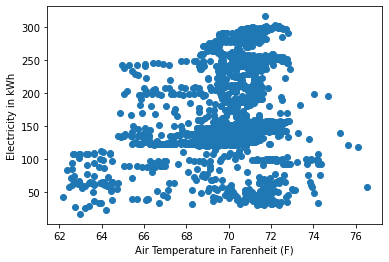

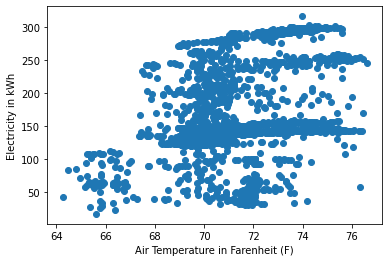

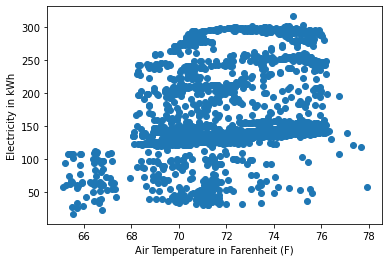

In [12]:
for room_air_temperature in df[terminal_room_air_temperature]:
    air_temp = df[room_air_temperature].to_numpy()
    plt.subplot
    plt.scatter(air_temp, electricity)
    plt.xlabel('Air Temperature in Farenheit (F)')
    plt.ylabel('Electricity in kWh')
    plt.show()

Electricity consumed is less at temperature less than 70 Farenheits whereas above that it doesn't shows much of a independent co-relation with the data. Let's plot the electricity data with average temperature of the terminal rooms.

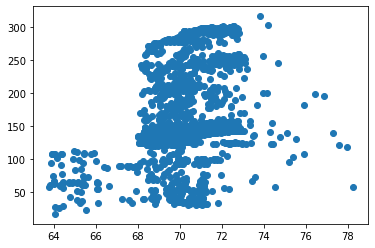

In [13]:
avg_terminal_room_temperature = []
for ind in df[terminal_room_air_temperature].index:
    a = df[terminal_room_air_temperature].iloc[ind].to_numpy()
    avg_terminal_room_temperature.append(a.mean())
plt.scatter(avg_terminal_room_temperature, electricity)

### Plotting and analysing discrete features of our dataset

In [14]:
discrete_feature=[feature for feature in df.columns if len(df[feature].unique())<25 and feature not in df['index']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

## Counts of discerete variables

Discrete Variables Count: 18


In [15]:
discrete_feature

['RTU: Natural Gas',
 'Occupancy Mode Indicator',
 'Terminal: Room Air Temperature Heating Setpoint',
 'Terminal: Room Air Temperature Cooling Setpoint',
 'Lighting System: Control Command',
 'RTU: Compressor 1 On/Off Status',
 'RTU: Compressor 2 On/Off Status',
 'VAV Box: Room 102 Reheat Status',
 'VAV Box: Room 103 Reheat Status',
 'VAV Box: Room 104 Reheat Status',
 'VAV Box: Room 105 Reheat Status',
 'VAV Box: Room 106 Reheat Status',
 'VAV Box: Room 202 Reheat Status',
 'VAV Box: Room 203 Reheat Status',
 'VAV Box: Room 204 Reheat Status',
 'VAV Box: Room 205 Reheat Status',
 'VAV Box: Room 206 Reheat Status',
 'Fault Detection Ground Truth']

In [16]:
discrete_features_df = df[discrete_feature].drop('Terminal: Room Air Temperature Heating Setpoint', axis=1)
discrete_features_df = discrete_features_df.drop('Terminal: Room Air Temperature Cooling Setpoint', axis=1)

In [17]:
discrete_features_df.head()

,RTU: Natural Gas,Occupancy Mode Indicator,Lighting System: Control Command,RTU: Compressor 1 On/Off Status,RTU: Compressor 2 On/Off Status,VAV Box: Room 102 Reheat Status,VAV Box: Room 103 Reheat Status,VAV Box: Room 104 Reheat Status,VAV Box: Room 105 Reheat Status,VAV Box: Room 106 Reheat Status,VAV Box: Room 202 Reheat Status,VAV Box: Room 203 Reheat Status,VAV Box: Room 204 Reheat Status,VAV Box: Room 205 Reheat Status,VAV Box: Room 206 Reheat Status,Fault Detection Ground Truth
0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
4,0.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1


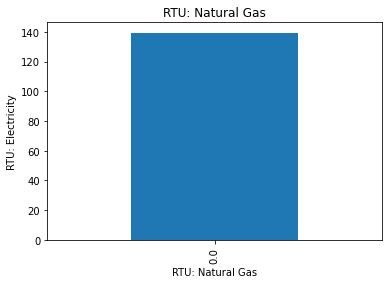

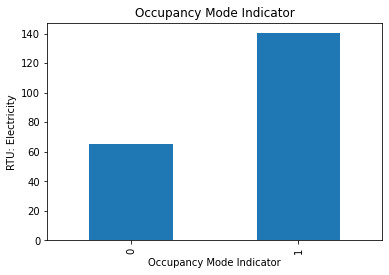

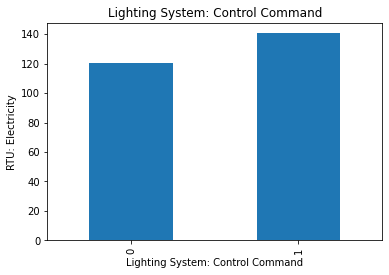

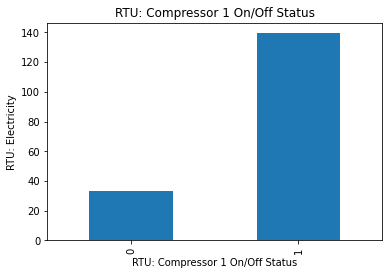

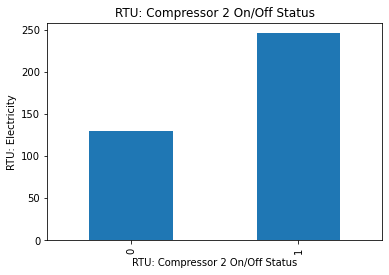

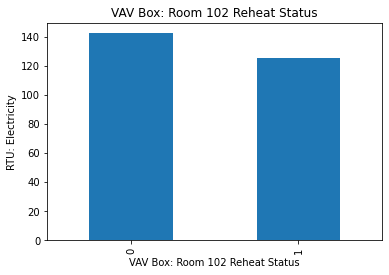

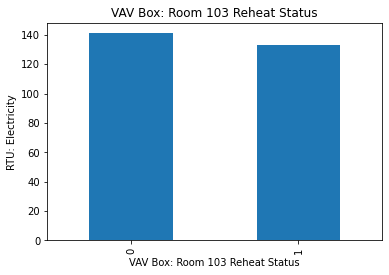

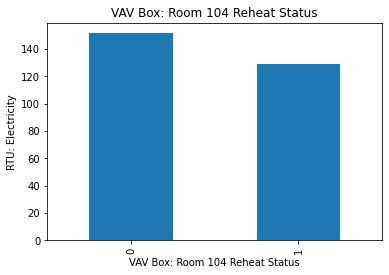

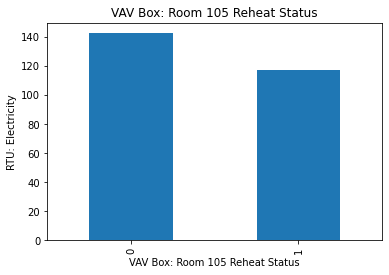

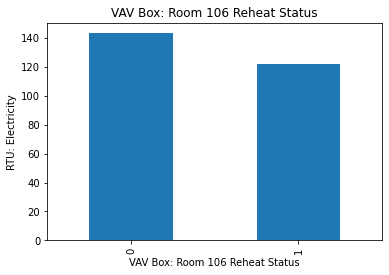

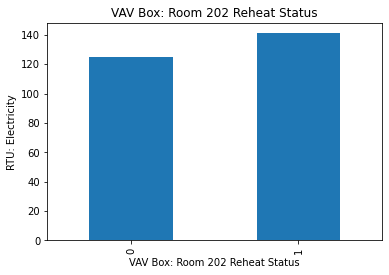

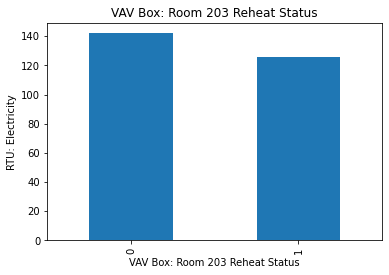

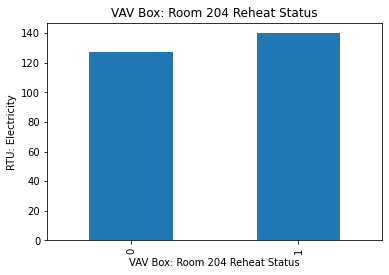

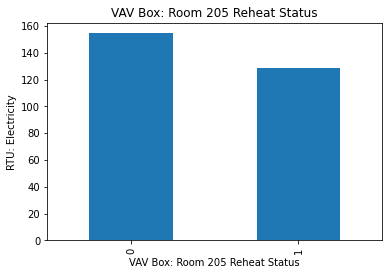

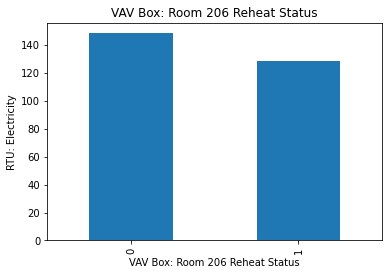

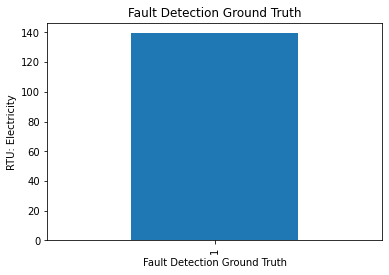

In [18]:
for feature in discrete_features_df:
    data=df.copy()
    data.groupby(feature)['RTU: Electricity'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('RTU: Electricity')
    plt.title(feature)
    plt.show()

### Plotting and analysing continuous features of our dataset

In [19]:
continuous_feature=[feature for feature in df.columns if feature not in discrete_features_df.columns and feature not in ['Timestamp'] and feature not in ['index']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 51


In [20]:
continuous_feature

['RTU: Supply Air Temperature',
 'RTU: Return Air Temperature',
 'RTU: Circuit 1 Discharge Temperature',
 'RTU: Circuit 1 Condenser Outlet Temperature',
 'RTU: Circuit 1 Suction Temperature',
 'RTU: Circuit 2 Discharge Temperature',
 'RTU: Circuit 2 Condenser Outlet Temperature',
 'RTU: Circuit 2 Suction Temperature',
 'RTU: Circuit 1 Discharge Pressure',
 'RTU: Circuit 1 Condenser Outlet Pressure',
 'RTU: Circuit 1 Suction Pressure',
 'RTU: Circuit 2 Discharge Pressure',
 'RTU: Circuit 2 Condenser Outlet Pressure',
 'RTU: Circuit 2 Suction Pressure',
 'RTU: Supply Air Volumetric Flow Rate',
 'RTU: Electricity',
 'Terminal: Room 102 Air Humidity',
 'Terminal: Room 103 Air Humidity',
 'Terminal: Room 104 Air Humidity',
 'Terminal: Room 105 Air Humidity',
 'Terminal: Room 106 Air Humidity',
 'Terminal: Room 202 Air Humidity',
 'Terminal: Room 203 Air Humidity',
 'Terminal: Room 204 Air Humidity',
 'Terminal: Room 205 Air Humidity',
 'Terminal: Room 206 Air Humidity',
 'Terminal: Room 102

Lets find insights from the pressure data with respect to the electricity consumption.

In [21]:
feature_pressure = [feature for feature in df[continuous_feature] if 'Pressure' in feature]
feature_pressure

['RTU: Circuit 1 Discharge Pressure',
 'RTU: Circuit 1 Condenser Outlet Pressure',
 'RTU: Circuit 1 Suction Pressure',
 'RTU: Circuit 2 Discharge Pressure',
 'RTU: Circuit 2 Condenser Outlet Pressure',
 'RTU: Circuit 2 Suction Pressure']

Let's perform logarithmic transformation of this pressure data and plot it corresponding to electricity consumed.

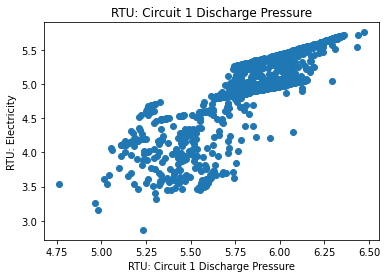

C:\Users\91830\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


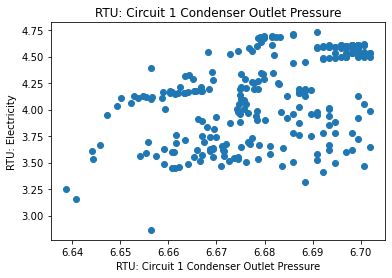

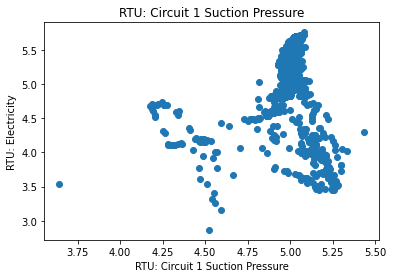

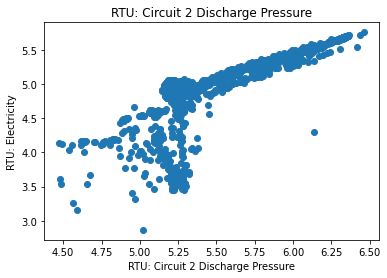

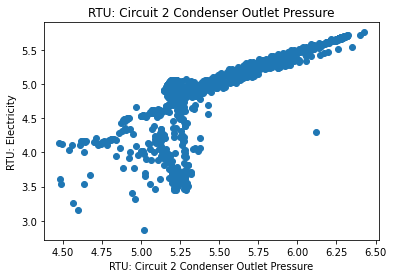

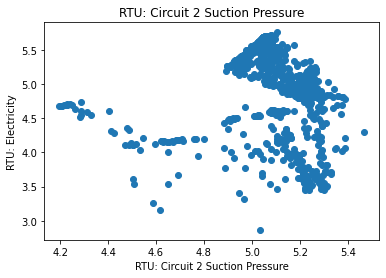

In [22]:
for feature in df[feature_pressure]:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['RTU: Electricity'] = np.log(data['RTU: Electricity'])
        plt.scatter(data[feature], data['RTU: Electricity'])
        plt.xlabel(feature)
        plt.ylabel('RTU: Electricity')
        plt.title(feature)
        plt.show()

Now let's plot a scatter plot with respect to the average pressures and RTU: Electricity

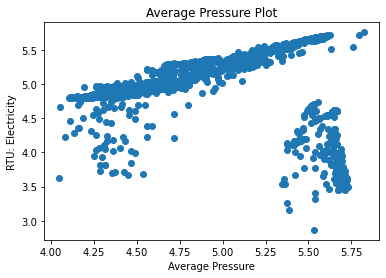

In [23]:
avg_pressure_arr = []
for ind in df[feature_pressure].index:
    a = df[feature_pressure].iloc[ind].to_numpy()
    avg_pressure_arr.append(a.mean())
plt.scatter(np.log(avg_pressure_arr), np.log(electricity))
plt.xlabel('Average Pressure')
plt.ylabel('RTU: Electricity')
plt.title('Average Pressure Plot')
plt.show()

### Electricity Prediction 

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df, df['RTU: Electricity'], test_size = 0.1, random_state = 0)

In [76]:
X_train.head()

,index,Timestamp,RTU: Supply Air Temperature,RTU: Return Air Temperature,RTU: Circuit 1 Discharge Temperature,RTU: Circuit 1 Condenser Outlet Temperature,RTU: Circuit 1 Suction Temperature,RTU: Circuit 2 Discharge Temperature,RTU: Circuit 2 Condenser Outlet Temperature,RTU: Circuit 2 Suction Temperature,RTU: Circuit 1 Discharge Pressure,RTU: Circuit 1 Condenser Outlet Pressure,RTU: Circuit 1 Suction Pressure,RTU: Circuit 2 Discharge Pressure,RTU: Circuit 2 Condenser Outlet Pressure,RTU: Circuit 2 Suction Pressure,RTU: Supply Air Volumetric Flow Rate,RTU: Electricity,RTU: Natural Gas,Occupancy Mode Indicator,Terminal: Room 102 Air Humidity,Terminal: Room 103 Air Humidity,Terminal: Room 104 Air Humidity,Terminal: Room 105 Air Humidity,Terminal: Room 106 Air Humidity,Terminal: Room 202 Air Humidity,Terminal: Room 203 Air Humidity,Terminal: Room 204 Air Humidity,Terminal: Room 205 Air Humidity,Terminal: Room 206 Air Humidity,Terminal: Room 102 Air Temperature,Terminal: Room 103 Air Temperature,Terminal: Room 104 Air Temperature,Terminal: Room 105 Air Temperature,Terminal: Room 106 Air Temperature,Terminal: Room 202 Air Temperature,Terminal: Room 203 Air Temperature,Terminal: Room 204 Air Temperature,Terminal: Room 205 Air Temperature,Terminal: Room 206 Air Temperature,Terminal: Room Air Temperature Heating Setpoint,Terminal: Room Air Temperature Cooling Setpoint,HVAC System: Electricity,Lighting System: Electricity,Lighting System: Control Command,RTU: Compressor 1 On/Off Status,RTU: Compressor 2 On/Off Status,RTU: Fan Electricity,VAV Box: Room 102 Reheat Status,VAV Box: Room 103 Reheat Status,VAV Box: Room 104 Reheat Status,VAV Box: Room 105 Reheat Status,VAV Box: Room 106 Reheat Status,VAV Box: Room 202 Reheat Status,VAV Box: Room 203 Reheat Status,VAV Box: Room 204 Reheat Status,VAV Box: Room 205 Reheat Status,VAV Box: Room 206 Reheat Status,VAV Box: Room 102 Air Temperature,VAV Box: Room 103 Air Temperature,VAV Box: Room 104 Air Temperature,VAV Box: Room 105 Air Temperature,VAV Box: Room 106 Air Temperature,VAV Box: Room 202 Air Temperature,VAV Box: Room 203 Air Temperature,VAV Box: Room 204 Air Temperature,VAV Box: Room 205 Air Temperature,VAV Box: Room 206 Air Temperature,Fault Detection Ground Truth
2840,17077,12/24/2017 20:37,52.97,69.10,107.9,72.64,54.56,58.24,50.97,58.91,227.5,785.4,182.8,178.3,178.1,180.5,3192.0,50.09011,0.0,1,46.00,42.98,43.25,38.35,39.35,47.78,45.86,40.22,40.56,43.41,68.53,70.56,70.27,72.45,71.34,68.77,67.83,72.35,71.95,71.06,69.8,75.2,482.845311,26.829850,1,1,0,28.30221,1,0,1,1,1,1,1,1,1,1,82.10,54.03,75.33,81.20,75.88,61.67,67.46,83.50,86.10,82.10,1
1503,2485,8/29/2017 17:25,58.27,73.82,154.6,107.30,50.66,118.10,100.10,85.40,454.9,-476.2,160.0,182.0,182.6,185.2,4336.0,155.57940,0.0,1,52.62,52.51,44.06,40.32,47.41,55.45,53.33,48.11,44.28,48.64,70.24,70.16,74.10,76.35,72.26,69.68,70.11,72.51,75.03,73.23,69.8,75.2,169.959670,40.785090,1,1,0,35.92026,0,0,0,0,0,1,0,1,0,0,58.36,58.01,58.28,58.26,58.11,62.10,58.31,60.09,58.39,58.44,1
817,1232,8/27/2017 20:32,54.85,71.10,135.1,85.00,57.73,123.50,77.95,63.42,345.6,-480.1,148.3,177.4,178.1,180.4,4378.0,133.65060,0.0,1,52.68,51.55,49.94,48.30,49.91,52.73,52.83,48.51,48.17,49.18,67.80,68.32,68.28,68.59,68.02,68.68,67.50,69.51,69.73,70.07,69.8,75.2,249.816680,27.399640,1,1,0,36.15111,1,1,1,0,0,1,1,1,1,1,59.71,60.08,61.48,54.58,54.67,63.78,65.99,61.86,59.74,59.02,1
2454,4007,9/1/2017 18:47,53.53,69.41,127.6,75.51,59.03,112.30,70.71,62.23,304.4,-575.7,143.1,174.6,175.2,177.6,4339.0,125.10990,0.0,1,52.23,50.56,48.35,49.14,48.62,52.04,53.38,48.17,47.16,48.99,67.35,67.97,68.57,67.22,68.05,68.01,66.19,68.62,69.39,69.26,69.8,75.2,298.031739,31.562629,1,1,0,36.01260,1,1,1,1,1,1,1,1,1,1,58.91,57.78,62.06,56.08,58.41,61.59,59.49,61.01,64.78,59.58,1
2255,3802,9/1/2017 15:22,54.92,70.40,135.1,82.60,58.00,108.00,76.72,65.96,332.3,-566.8,146.5,178.0,178.7,180.9,4347.0,129.72650,0.0,1,49.64,49.56,47.70,45.06,47.04,52.13,49.25,47.24,46.92,47.06,69.31,69.17,69.39,70.43,69.83,68.

In [77]:
X_train.shape

(2580, 69)

In [78]:
X_train = X_train.drop(['Timestamp','index'],axis =1)
X_test = X_test.drop(['index', 'Timestamp'], axis =1)

### Data Pre-processing

In [79]:
features=[feature for feature in X_train.columns if X_train[feature].dtype!='O' and feature not in discrete_features_df]
for feature in features:
    temp = X_train[feature].to_numpy()
    mean = temp.mean()
    if mean == 0:
        pass
    else:
        X_train[feature] = np.divide(X_train[feature],mean)
        X_test[feature] = np.divide(X_test[feature],mean)
        
Y_train = np.log(Y_train)
Y_test = np.log(Y_test)

## Here we meaned out all the values before passing it to our model to predict electricity consumption also we left
## discrete variables because dividing them with there mean would make their bias 

In [80]:
X_train.head()

,RTU: Supply Air Temperature,RTU: Return Air Temperature,RTU: Circuit 1 Discharge Temperature,RTU: Circuit 1 Condenser Outlet Temperature,RTU: Circuit 1 Suction Temperature,RTU: Circuit 2 Discharge Temperature,RTU: Circuit 2 Condenser Outlet Temperature,RTU: Circuit 2 Suction Temperature,RTU: Circuit 1 Discharge Pressure,RTU: Circuit 1 Condenser Outlet Pressure,RTU: Circuit 1 Suction Pressure,RTU: Circuit 2 Discharge Pressure,RTU: Circuit 2 Condenser Outlet Pressure,RTU: Circuit 2 Suction Pressure,RTU: Supply Air Volumetric Flow Rate,RTU: Electricity,RTU: Natural Gas,Occupancy Mode Indicator,Terminal: Room 102 Air Humidity,Terminal: Room 103 Air Humidity,Terminal: Room 104 Air Humidity,Terminal: Room 105 Air Humidity,Terminal: Room 106 Air Humidity,Terminal: Room 202 Air Humidity,Terminal: Room 203 Air Humidity,Terminal: Room 204 Air Humidity,Terminal: Room 205 Air Humidity,Terminal: Room 206 Air Humidity,Terminal: Room 102 Air Temperature,Terminal: Room 103 Air Temperature,Terminal: Room 104 Air Temperature,Terminal: Room 105 Air Temperature,Terminal: Room 106 Air Temperature,Terminal: Room 202 Air Temperature,Terminal: Room 203 Air Temperature,Terminal: Room 204 Air Temperature,Terminal: Room 205 Air Temperature,Terminal: Room 206 Air Temperature,Terminal: Room Air Temperature Heating Setpoint,Terminal: Room Air Temperature Cooling Setpoint,HVAC System: Electricity,Lighting System: Electricity,Lighting System: Control Command,RTU: Compressor 1 On/Off Status,RTU: Compressor 2 On/Off Status,RTU: Fan Electricity,VAV Box: Room 102 Reheat Status,VAV Box: Room 103 Reheat Status,VAV Box: Room 104 Reheat Status,VAV Box: Room 105 Reheat Status,VAV Box: Room 106 Reheat Status,VAV Box: Room 202 Reheat Status,VAV Box: Room 203 Reheat Status,VAV Box: Room 204 Reheat Status,VAV Box: Room 205 Reheat Status,VAV Box: Room 206 Reheat Status,VAV Box: Room 102 Air Temperature,VAV Box: Room 103 Air Temperature,VAV Box: Room 104 Air Temperature,VAV Box: Room 105 Air Temperature,VAV Box: Room 106 Air Temperature,VAV Box: Room 202 Air Temperature,VAV Box: Room 203 Air Temperature,VAV Box: Room 204 Air Temperature,VAV Box: Room 205 Air Temperature,VAV Box: Room 206 Air Temperature,Fault Detection Ground Truth
2840,0.957206,0.970310,0.793451,0.810826,1.035358,0.522644,0.599434,0.907037,0.615224,-2.052766,1.227322,0.711081,0.726498,1.040084,0.759623,0.319376,0.0,1,0.914900,0.879068,0.899298,0.850024,0.844255,0.918358,0.912956,0.840545,0.874512,0.928522,0.987366,1.009192,1.007436,1.020765,1.011587,0.995540,0.980615,1.033489,1.012333,0.988505,1.003002,0.998641,2.125186,0.801173,1,1,0,0.809574,1,0,1,1,1,1,1,1,1,1,1.406599,0.950769,1.265441,1.396310,1.285037,1.024006,1.156469,1.355957,1.440042,1.389404,1
1503,1.052981,1.036589,1.136863,1.197709,0.961350,1.059826,1.177228,1.314904,1.230178,1.244623,1.074242,0.725837,0.744854,1.067166,1.031869,0.991978,0.0,1,1.046566,1.073985,0.916141,0.893689,1.017183,1.065780,1.061665,1.005435,0.954719,1.040390,1.012004,1.003471,1.062345,1.075713,1.024632,1.008713,1.013577,1.035774,1.055669,1.018691,1.003002,0.998641,0.748057,1.217893,1,1,0,1.027485,0,0,0,0,0,1,0,1,0,0,0.999867,1.020805,0.979024,1.001835,0.984100,1.031146,0.999610,0.975802,0.976586,0.988998,1
817,0.991179,0.998395,0.993468,0.948791,1.095513,1.108286,0.916732,0.976478,0.934600,1.254816,0.995689,0.707492,0.726498,1.039508,1.041864,0.852159,0.0,1,1.047759,1.054350,1.038404,1.070565,1.070820,1.013500,1.051711,1.013795,1.038591,1.051940,0.976849,0.977155,0.978906,0.966381,0.964510,0.994237,0.975845,0.992920,0.981098,0.974733,1.003002,0.998641,1.099538,0.818187,1,1,0,1.034089,1,1,1,0,0,1,1,1,1,1,1.022997,1.057231,1.032780,0.938554,0.925843,1.059041,1.131269,1.004545,0.999165,0.998814,1
2454,0.967326,0.974663,0.938316,0.842861,1.120183,1.007777,0.831586,0.958155,0.823184,1.504682,0.960776,0.696325,0.714668,1.023373,1.032583,0.797703,0.0,1,1.038809,1.034102,1.005343,1.089183,1.043143,1.000238,1.062660,1.006689,1.016814,1.047876,0.970365,0.972149,0.983064,0.947078

In [81]:
X_train.shape, X_test.shape

((2580, 67), (287, 67))

### Lasso Model to predict target variable

In [87]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [111]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, Y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print("Mean Squared Error of our train data: ",np.sqrt(mean_squared_error(Y_train,pred_train_lasso)))
print("Percentage score over train dataset: ",r2_score(Y_train, pred_train_lasso)*100,"%")

pred_test_lasso= model_lasso.predict(X_test)
print("Mean Squared Error of our test data: " ,np.sqrt(mean_squared_error(Y_test,pred_test_lasso))) 
print("Percentage score over test dataset: ",r2_score(Y_test, pred_test_lasso)*100,"%")

Mean Squared Error of our train data:  0.1066556654919969
Percentage score over train dataset:  93.59888079804475 %
Mean Squared Error of our test data:  0.10432942437593666
Percentage score over test dataset:  94.02426174643695 %


### Feature Selection (using lasso)

In [89]:
from sklearn.feature_selection import SelectFromModel

In [90]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) 
# remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, Y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [91]:
feature_sel_model.get_support()

array([False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False])

In [93]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 67
selected features: 4
features with coefficients shrank to zero: 63


In [94]:
selected_feat

Index(['RTU: Circuit 1 Condenser Outlet Pressure',
       'RTU: Circuit 2 Condenser Outlet Pressure', 'RTU: Electricity',
       'VAV Box: Room 206 Reheat Status'],
      dtype='object')

In [98]:
X_train=X_train[selected_feat]
X_test = X_test[selected_feat]

In [99]:
X_train.head()

,RTU: Circuit 1 Condenser Outlet Pressure,RTU: Circuit 2 Condenser Outlet Pressure,RTU: Electricity,VAV Box: Room 206 Reheat Status
2840,-2.052766,0.726498,0.319376,1
1503,1.244623,0.744854,0.991978,0
817,1.254816,0.726498,0.852159,1
2454,1.504682,0.714668,0.797703,1
2255,1.481420,0.728945,0.827139,1


In [101]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, Y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(Y_train,pred_train_lasso)))
print(r2_score(Y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,pred_test_lasso))) 
print(r2_score(Y_test, pred_test_lasso))

0.1066556654919969
0.9359888079804475
0.10432942437593666
0.9402426174643694


As we can see that Lasso Regression automatically chooses the important features from data and turn the coefficients of
other to be zero.

We have successfully predicted our data with 94% accuracy which is pretty good for our case.